In [2]:
%run ExoTides_analytic.ipynb # load functions

In [3]:
## calculate equilibrium rotation rate varying tau_lw and p_s

taulw_contour_list = 10**np.linspace(-4, 3,110)
ps_contour_list = 10**np.linspace(-2, 3,100)*1e5
alpha_contour_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
M_star_list = [0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

eq_rot_contour_taulwps = np.zeros([len(M_star_list),len(alpha_contour_list),len(taulw_contour_list), len(ps_contour_list)])

for m in range(len(M_star_list)):
    M = M_star_list[m]*M_sun
    mu_star = np.log10(M/M_sun)
    L_star = L_sun*10**(4.101*mu_star**3 + 8.162*mu_star**2 + 7.108*mu_star)
    a_midHZ = AU*(L_star/L_sun)**(1/2)
    orbit_period = (a_midHZ**3 * 4* np.pi**2/(G*M))**(1/2)
    n = 2*np.pi/orbit_period
    for k in range(len(alpha_contour_list)):
        for i in range(len(taulw_contour_list)):
            for j in range(len(ps_contour_list)):
                tau_sw = 0.1
                rot = eq_rotation_ana(M, R_E, a_midHZ, alpha_contour_list[k], tau_sw, taulw_contour_list[i], ps_contour_list[j], 90, 100, k2) # returns 2*sigma
                eq_rot_contour_taulwps[m,k,i,j] = (rot/2+n)/(n)



<ipython-input-4-6485dff60f74>:16: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,2], levels = [0], colors = 'red')
<ipython-input-4-6485dff60f74>:17: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,5], levels = [0], colors = 'orange')
<ipython-input-4-6485dff60f74>:18: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,7], levels = [0], colors = 'yellow')
<ipython-input-4-6485dff60f74>:19: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,-1], levels = [0], colors = 'blue')
<ipython-input-4-6485dff60f74>:16: UserWarning: No contour levels were found within the data

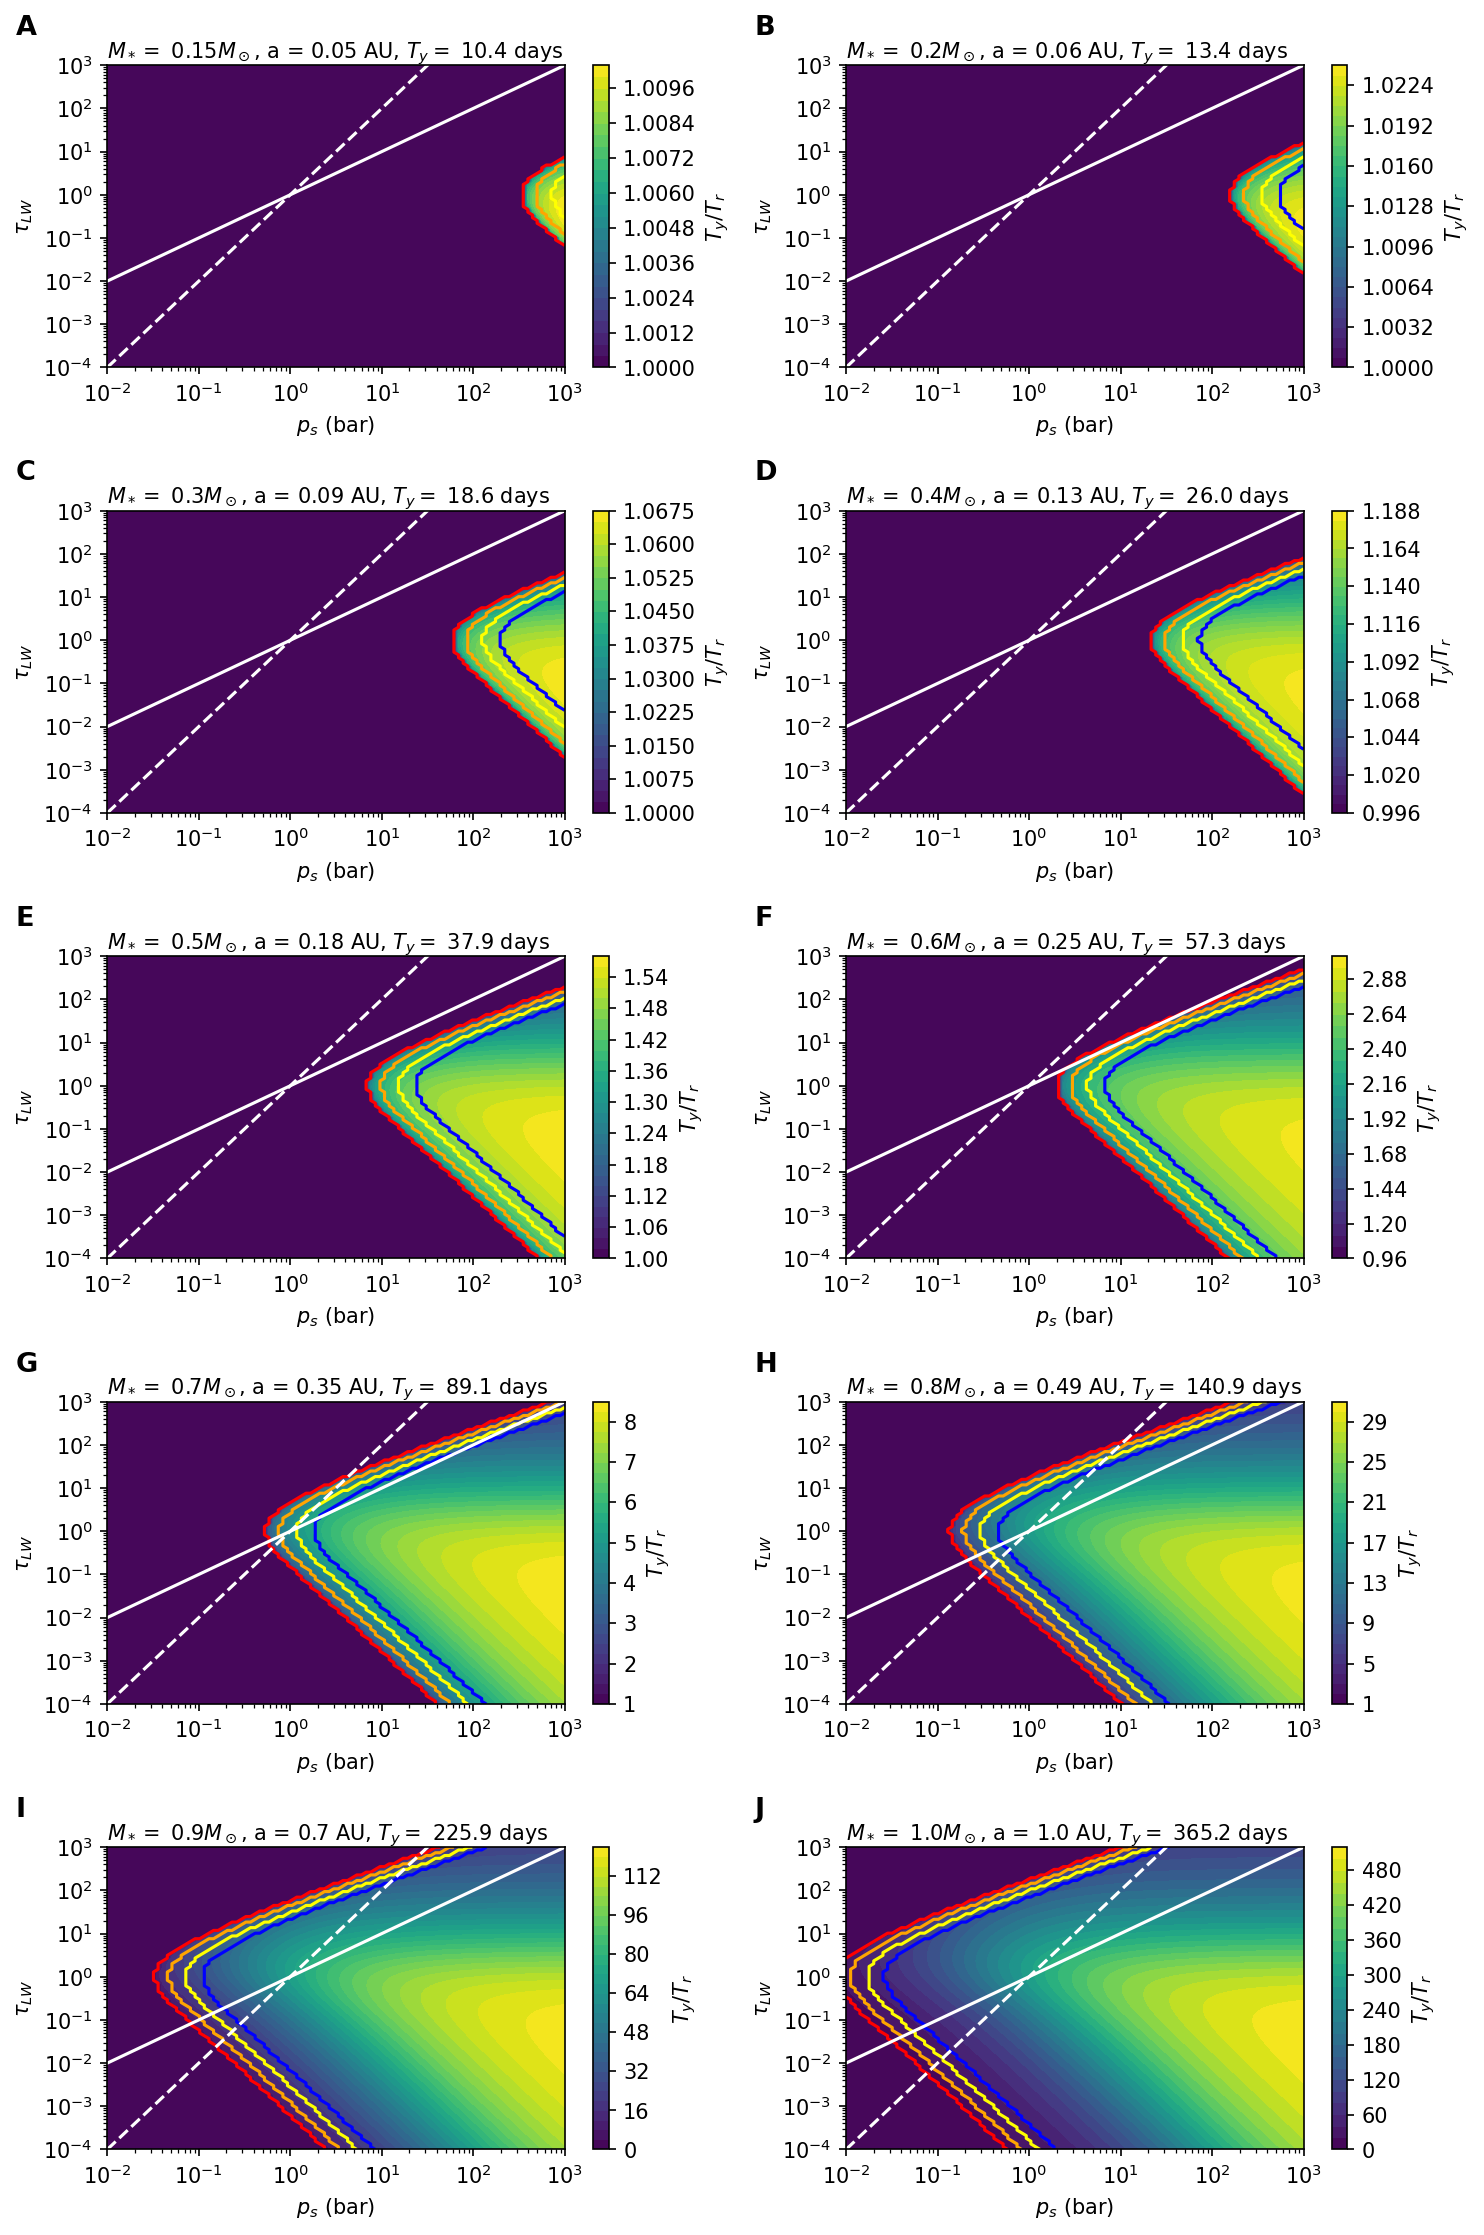

In [4]:
eq_rot_contour_taulwps_plot = eq_rot_contour_taulwps.reshape(5,2,9,110,100)
fig, ax = plt.subplots(5,2, dpi = 150, figsize = (10,15),tight_layout = True)
M_star_list_plot = np.array(M_star_list).reshape(5,2)
letter = [['A','B'],['C','D'],['E','F'],['G','H'],['I','J']]
for i in range(5):
    for j in range(2):
        M = M_star_list_plot[i,j]*M_sun
        mu_star = np.log10(M/M_sun)
        L_star = L_sun*10**(4.101*mu_star**3 + 8.162*mu_star**2 + 7.108*mu_star)
        a_midHZ = AU*(L_star/L_sun)**(1/2)
        orbit_period_midHZ = (a_midHZ**3 * 4* np.pi**2/(G*M))**(1/2)/(60*60*24)
        c = ax[i,j].contourf(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,2], levels = 30, cmap = 'viridis')
        plt.colorbar(c, ax = ax[i,j],label = '$T_y/T_r$')
        ax[i,j].plot(ps_contour_list/bar, 1*ps_contour_list/bar, 'w-')
        ax[i,j].plot(ps_contour_list/bar, 1*(ps_contour_list/bar)**2, 'w--')
        ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,2], levels = [0], colors = 'red')
        ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,5], levels = [0], colors = 'orange')
        ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,7], levels = [0], colors = 'yellow')
        ax[i,j].contour(ps_contour_list/bar, taulw_contour_list, eq_rot_contour_taulwps_plot[i,j,-1], levels = [0], colors = 'blue')
        ax[i,j].text(0.01, 1450, '$M_* = $ ' + str(np.round(M/M_sun,2)) + '$M_\odot$, a = ' + str(np.around(a_midHZ/AU,2)) + ' AU, $T_y = $ ' + str(np.around(orbit_period_midHZ,1)) + ' days')
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log')
        ax[i,j].set_ylabel('$\\tau_{LW}$')
        ax[i,j].set_xlabel('$p_s$ (bar)')
        ax[i,j].set_ylim(1e-4, 1e3)
        
        
        
        ax[i,j].text(-0.2, 1.1, np.array(letter)[i,j], transform=ax[i,j].transAxes, size=13, weight='bold')
plt.savefig('./Paper Plots/SW_2024_Figure5.pdf', bbox_inches='tight')